<a href="https://colab.research.google.com/github/creatloper/Indian_Startups/blob/master/Indian_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction-**


This paper shows the insights of funding done by startups and how growth changed with several factors. The aim of paper is to get a descriptive overview and a relationship pattern of funding and growth of newly launched startups. Another important point to understand how funding changes with time is an important aspect. Possible area of interests would be – (Funding ecosystem and time relation, cities as a important factor, which industries, important investors). Dataset we are using contains information of funding of startups from January 2015 to August 2017.The amount invested is in USD. Aggregation of data w.r.t cities, investors, funding type etc. is required to get an optimized result. Here we done major preprocessing of data and overcome problem of missing data and uncertain distributions. Also, Visualizations are done to find the anomalies and mining patterns from data. It seems to be some cities showing some abnormal behavior when it comes to funding.








In [58]:
import numpy as np #used for scientific computation
import pandas as pd #used for data mugging and preprocessing
import matplotlib.pyplot as plt #data visualization library
from pandas import DataFrame as show # dataframe is the optimised structure used here to clean and analyse data
import seaborn as sns # stastical visualization library
import squarify #used to make square area plots
%matplotlib inline 

Data Formatting

Reading and making dataframe of the csv formated file
Here we converted categorical data to 'category' type

Csv file-(startup_funding.csv)- contains the information of all startups(india) from 2015 to 2017

In [59]:
funding_data=pd.read_csv('../content/startup_funding.csv',dtype={
    
    'InvestmentType':'category'
    
})#read_csv function is used to import dataset 'startup_funding.csv'

In [60]:
funding_data.head(4)#display first 4 rows of dataframe

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,1/8/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,2/8/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,2/8/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,2/8/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN


In [61]:
total = funding_data.isnull().sum().sort_values(ascending = False)
percent = ((funding_data.isnull().sum()/funding_data.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])
missing_data.head()

,Total,Percent %
Remarks,1953,82.335582
SubVertical,936,39.460371
AmountInUSD,847,35.708263
CityLocation,179,7.546374
IndustryVertical,171,7.209106


In [62]:
del funding_data["Remarks"]
funding_data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,1/8/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,1,2/8/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,2,2/8/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,3,2/8/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,4,2/8/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"


In [63]:
import re
def calculate_n_investors(x):#function to calculate record wise number of investors
    if  re.search(',',x) and x!='empty':
        return len(x.split(','))
    elif x!='empty':
        return 1
    else:
        return -1
funding_data['numberofinvestors']=funding_data['InvestorsName'].replace(np.NaN,'empty').apply(calculate_n_investors)#removing missing investors and replacing with 'empty'

In [64]:
funding_data["AmountInUSD"] = funding_data["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
funding_data["AmountInUSD"] = pd.to_numeric(funding_data["AmountInUSD"])
funding_data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,numberofinvestors
0,0,1/8/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,1
1,1,2/8/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,1
2,2,2/8/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,7
3,3,2/8/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,4
4,4,2/8/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

Number of funding per month in decreasing order(Top 10)
 201601    104
201602    100
201606     98
201508     98
201507     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


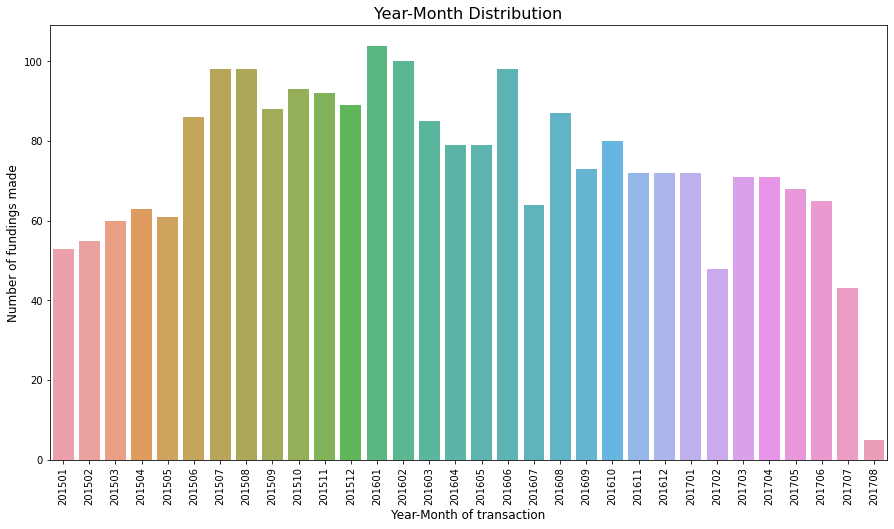

In [65]:
### Some more fixes in the data format. Will try to fix in the input file in next version #
funding_data['Date'][funding_data['Date']=='12/05.2015'] = '12/05/2015'
funding_data['Date'][funding_data['Date']=='13/04.2015'] = '13/04/2015'
funding_data['Date'][funding_data['Date']=='15/01.2015'] = '15/01/2015'
funding_data['Date'][funding_data['Date']=='22/01//2015'] = '22/01/2015'
funding_data["yearmonth"] = (pd.to_datetime(funding_data['Date'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(funding_data['Date'],format='%d/%m/%Y').dt.month)
temp = funding_data['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = funding_data['yearmonth'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(year_month.index, year_month.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

**As we can see that startups got more funding in January 2016(Total funding in January 2016 are 104). Above visualization shows how funding varies from one month to another.**

Conclusion from above :

*   July and August of 2015 had the highest investment that year because of the Digital India Campaign
*   January 2016 had the higest investment of 2016 and also in the dataset because of the Startup India Initaitive
*   As expected Demonitization lowered the investement per month from Nov '16 to July '17
*   Interseting note : July '16 saw a decrease of investment and the lowest in the year , may be beacuse of the Surgical strike that happed that month.
    



**Ques 2 : How much funds does startups generally get in India ?(maximum funding, minimum funding , average funding and number of fundings)**

In [66]:
print("Maximum funding to a Startups is : ",funding_data["AmountInUSD"].dropna().sort_values().max())

Maximum funding to a Startups is :  1400000000.0


In [67]:
funding_data[funding_data.AmountInUSD == 1400000000.0]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,numberofinvestors,yearmonth
158,158,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,1,201705
294,294,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,3,201703


In [68]:
funding_data[funding_data.StartupName == 'Paytm']

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,numberofinvestors,yearmonth
158,158,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,1,201705
821,821,30/8/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,1,201608
1787,1787,29/09/2015,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,2,201509
2218,2218,13/03/2015,Paytm,NaN,NaN,NaN,Ratan Tata,Private Equity,NaN,1,201503
2276,2276,5/2/2015,Paytm,NaN,NaN,NaN,Ant Financial Services (Alipay),Private Equity,NaN,1,201502


As we can see **Paytm and Flipkart** got maximum funding of **1400000000 USD**. Now lats see least funding

In [69]:
print("Minimum funding to a Startups is : ",funding_data["AmountInUSD"].dropna().sort_values().min())

Minimum funding to a Startups is :  16000.0


Now as we can see Hostel Dunia, Play your sport, Yo Grad, Enabli and CBS are least funded Startups i.e, 16000 USD

In [70]:
print("On Average indian startups got funding of : ",funding_data["AmountInUSD"].dropna().sort_values().mean())

On Average indian startups got funding of :  12031073.099016393


**On an Average indian startups got funding of : 12031073.099016393**

Total startups funded :  2001
Swiggy         7
UrbanClap      6
Medinfi        5
Jugnoo         5
NoBroker       5
Paytm          5
Simplilearn    4
HolaChef       4
YepMe          4
Voonik         4
Name: StartupName, dtype: int64


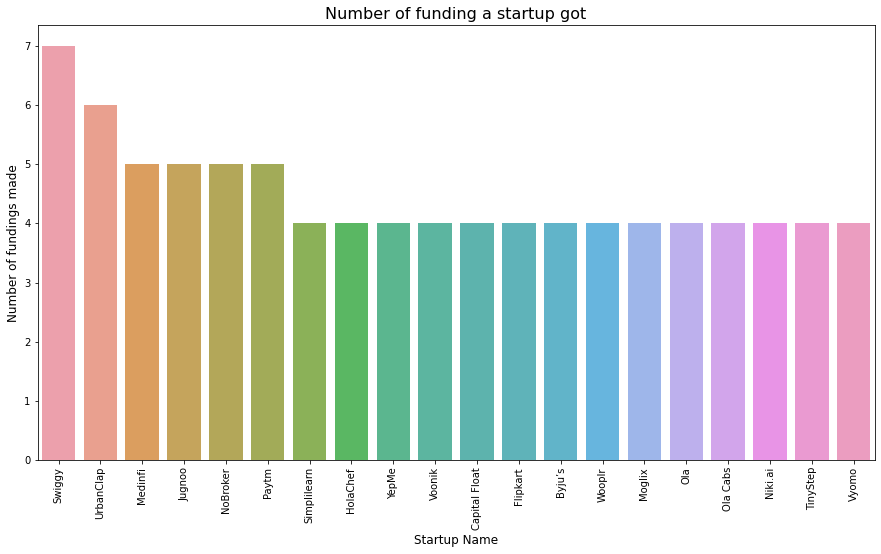

In [71]:
print("Total startups funded : ", len(funding_data["StartupName"].unique()))
print(funding_data["StartupName"].value_counts().head(10))
startupname = funding_data['StartupName'].value_counts().head(20)
plt.figure(figsize=(15,8))
sns.barplot(startupname.index, startupname.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of funding a startup got", fontsize=16)
plt.show()

As we can see that **Swiggy** got maximum number of fundings**(Total funding = 7)** and total there are 2001 indian startups funded from January 2015 to August 2017. The above visulization is only for Top 20 startups.

**Ques 3 : Which industries are favored by investors for funding ? (OR) Which type of companies got more easily funding ?**

Consumer Internet    772
Technology           313
eCommerce            171
ECommerce             53
Healthcare            30
Logistics             24
Education             20
Food & Beverage       19
Finance                9
Others                 6
Name: IndustryVertical, dtype: int64


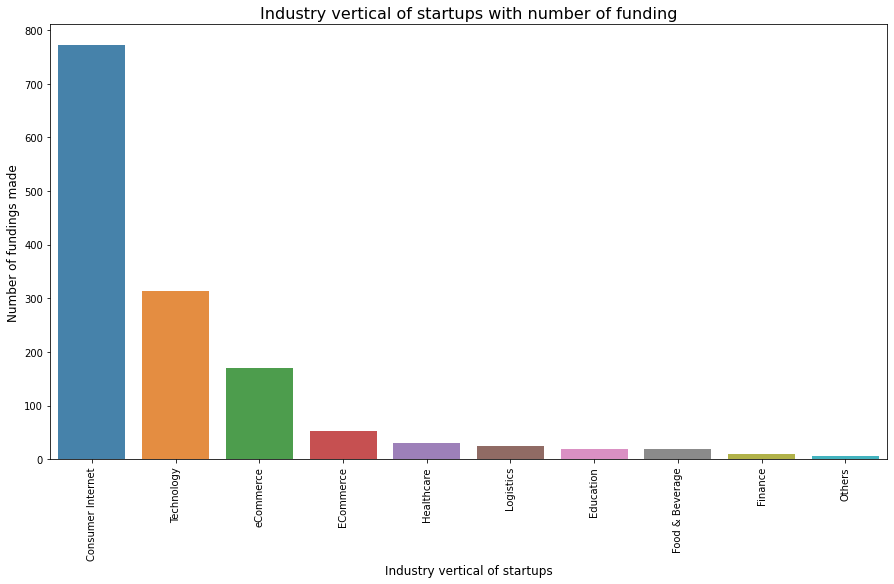

In [72]:
industry = funding_data['IndustryVertical'].value_counts().head(10)
print(industry)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

If we see Above **"Consumer Internet"** got maximum number of funding = 772 followed by technology and E-Commerce

Online Pharmacy             9
Food Delivery Platform      8
Online lending platform     5
Online Learning Platform    4
ECommerce Marketplace       3
Data Analytics platform     3
Online Payment Gateway      3
Fitness Mobile App          3
Fashion Apparel eTailer     2
Co-Working Spaces           2
Name: SubVertical, dtype: int64


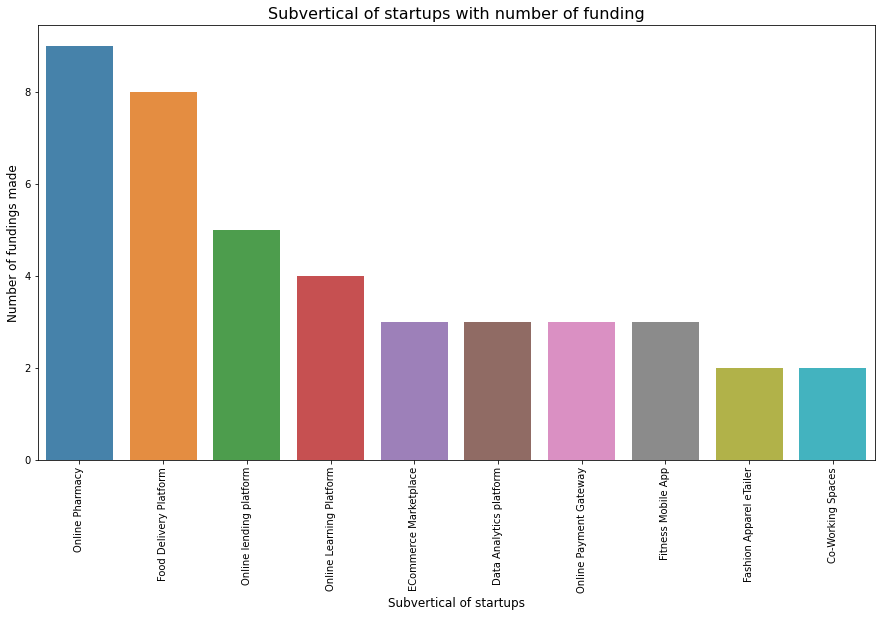

In [73]:
industry = funding_data['SubVertical'].value_counts().head(10)
print(industry)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

In Subcategores, "Online Phamacy" got maximim number of fundings.

**Ques 4 : Do cities play a major role in funding ? (OR) Which city has maximum startups ?**

Bangalore    627
Mumbai       446
New Delhi    381
Gurgaon      240
Pune          84
Noida         78
Hyderabad     76
Chennai       66
Ahmedabad     35
Jaipur        25
Name: CityLocation, dtype: int64


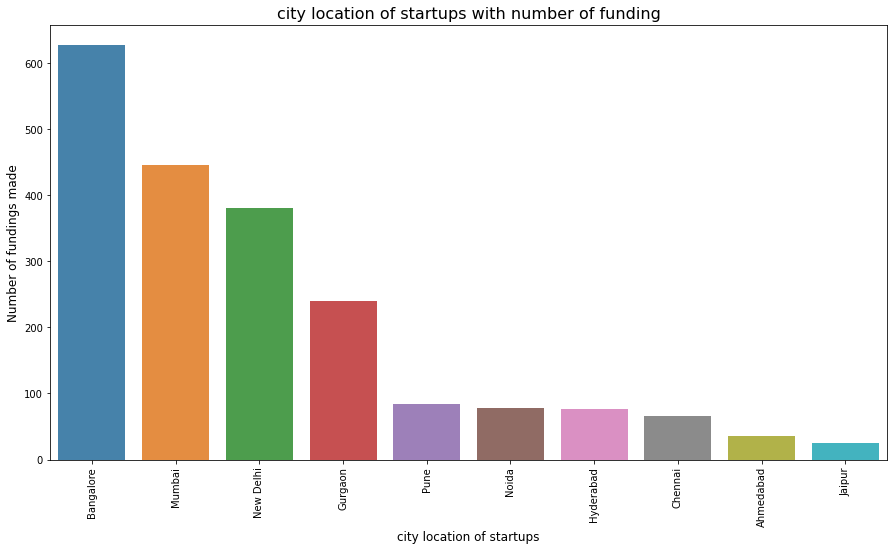

In [74]:
city = funding_data['CityLocation'].value_counts().head(10)
print(city)
plt.figure(figsize=(15,8))
sns.barplot(city.index, city.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("city location of startups with number of funding", fontsize=16)
plt.show()

Distribution of startups across Top different cities

Text(0.5, 1.0, 'Distribution of Startups across Top cities')

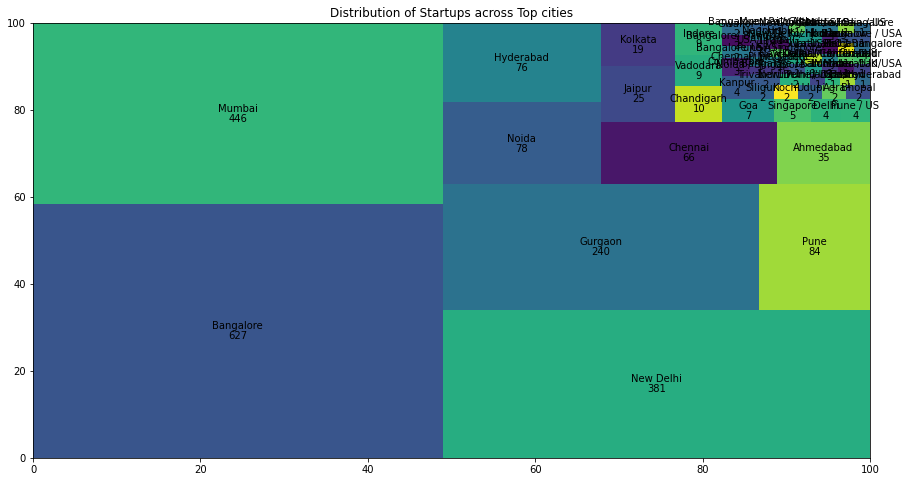

In [75]:
plt.figure(figsize=(15,8))
count = funding_data['CityLocation'].value_counts()
squarify.plot(sizes=count.values,label=count.index, value=count.values)
plt.title('Distribution of Startups across Top cities')

We can see **Bangalore** attracts more number of investotrs followed by Mumbai and New Delhi

**Ques 5 : Who is the important investors in the Indian Ecosystem?**

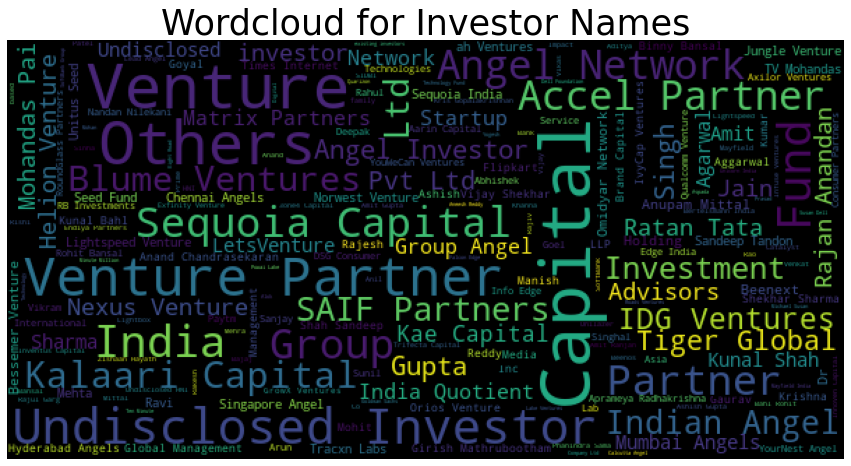

In [76]:
from wordcloud import WordCloud

names = funding_data["InvestorsName"][~pd.isnull(funding_data["InvestorsName"])]
#print(names)
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()

Undisclosed Investors       33
Undisclosed investors       27
Ratan Tata                  24
Indian Angel Network        24
Kalaari Capital             16
Group of Angel Investors    15
Sequoia Capital             14
undisclosed investors       11
Undisclosed Investor        10
RoundGlass Partners         10
Name: InvestorsName, dtype: int64


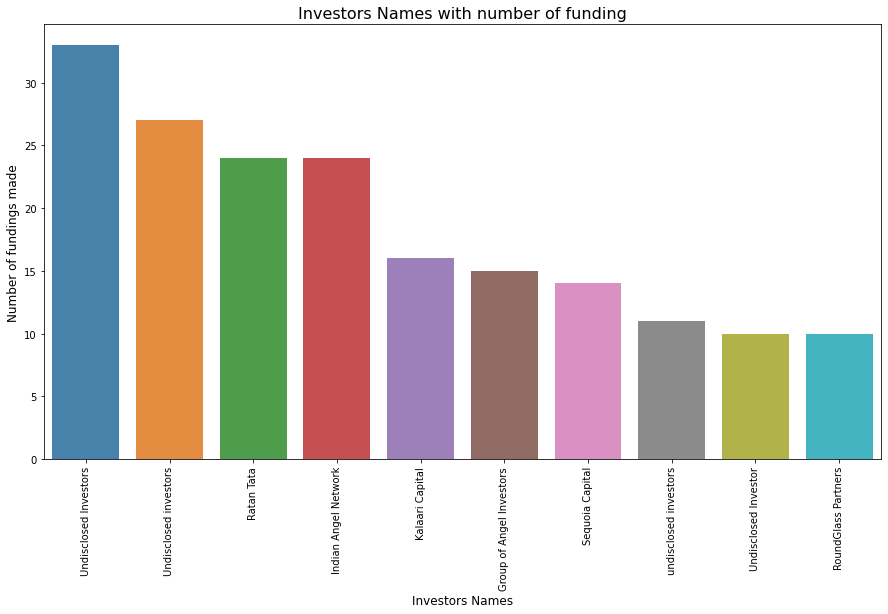

In [77]:
investors = funding_data['InvestorsName'].value_counts().head(10)
print(investors)
plt.figure(figsize=(15,8))
sns.barplot(investors.index, investors.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

**Indian Angel network and Ratan tata** funded maximum number of startups followed by Kalaari Caitals.

**Ques 6 : What are different types of funding for startups ?**

In [78]:
investment = funding_data['InvestmentType'].value_counts()
print(investment)

Seed Funding      1271
Private Equity    1066
SeedFunding         30
PrivateEquity        1
Debt Funding         1
Crowd funding        1
Crowd Funding        1
Name: InvestmentType, dtype: int64


In [79]:
funding_data['InvestmentType'][funding_data['InvestmentType'] == 'SeedFunding'] = 'Seed Funding'
funding_data['InvestmentType'][funding_data['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'
funding_data['InvestmentType'][funding_data['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'


Seed Funding      1301
Private Equity    1067
Crowd Funding        2
Debt Funding         1
SeedFunding          0
PrivateEquity        0
Crowd funding        0
Name: InvestmentType, dtype: int64


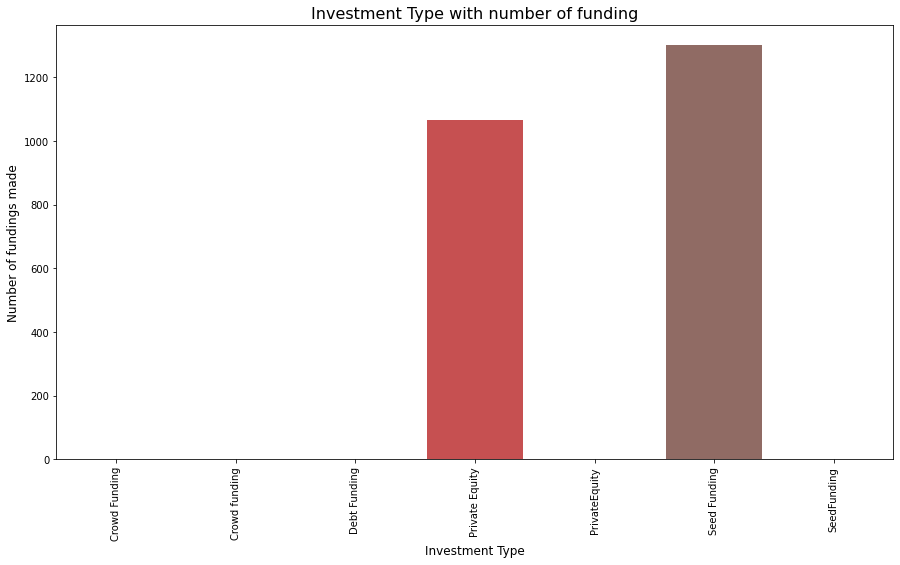

In [80]:
investment = funding_data['InvestmentType'].value_counts()
print(investment)
plt.figure(figsize=(15,8))
sns.barplot(investment.index, investment.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()

We can see Seed Funding is in Top followed by Private Equity.

Q7. Is funding depends upon number of investors
here we can see that there is 50% relation between funding amount and number of investors 

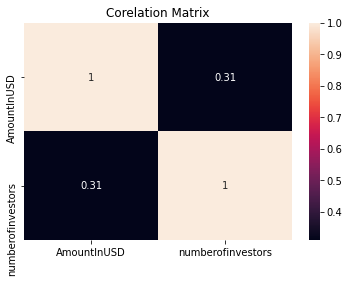

In [83]:
tp10fund=show(funding_data.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False))
cmi=show(funding_data.groupby('StartupName')['numberofinvestors'].count().sort_values(ascending=False))
top10 =tp10fund.join(cmi)
sns.heatmap(top10.corr(),annot=True)
plt.title('Corelation Matrix')
plt.show()

**Total amount of funding recieved as per investment type**

In [85]:
funding_data.groupby('InvestmentType').sum()['AmountInUSD']

InvestmentType
Crowd Funding     1.557680e+05
Crowd funding     0.000000e+00
Debt Funding      7.800000e+06
Private Equity    1.800708e+10
PrivateEquity     0.000000e+00
Seed Funding      3.323457e+08
SeedFunding       0.000000e+00
Name: AmountInUSD, dtype: float64

**Time Series Analysis**

In [92]:
funding_data['Date']=pd.to_datetime(funding_data['Date'],format='%d/%m/%Y')
dnewdf=funding_data.set_index('Date')
dnewdf.head()

,SNo,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,numberofinvestors,yearmonth
Date,,,,,,,,,,
2017-08-01,0,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,1,201708
2017-08-02,1,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,1,201708
2017-08-02,2,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,7,201708
2017-08-02,3,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,4,201708
2017-08-02,4,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,2,201708


In [93]:
print('total number of unique startups funded in 2017 -'+str(len(dnewdf['2017']['StartupName'].unique())))
print('total number of unique startups funded in 2016 -'+str(len(dnewdf['2016']['StartupName'].unique())))
print('total number of unique startups funded in 2015 -'+str(len(dnewdf['2015']['StartupName'].unique())))

total number of unique startups funded in 2017 -423
total number of unique startups funded in 2016 -937
total number of unique startups funded in 2015 -857


Total funding amount in 2015-2017

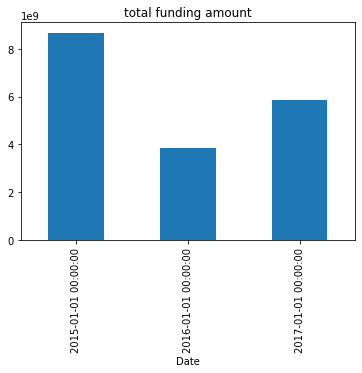

In [94]:
plt.title('total funding amount')
dnewdf.resample('AS')['AmountInUSD'].sum().plot.bar()
plt.show()

**Total variation of funding amount per month in period of 2015-2017**

Text(0.5, 1.0, 'Funding Variation Per Month from 2015-2017')

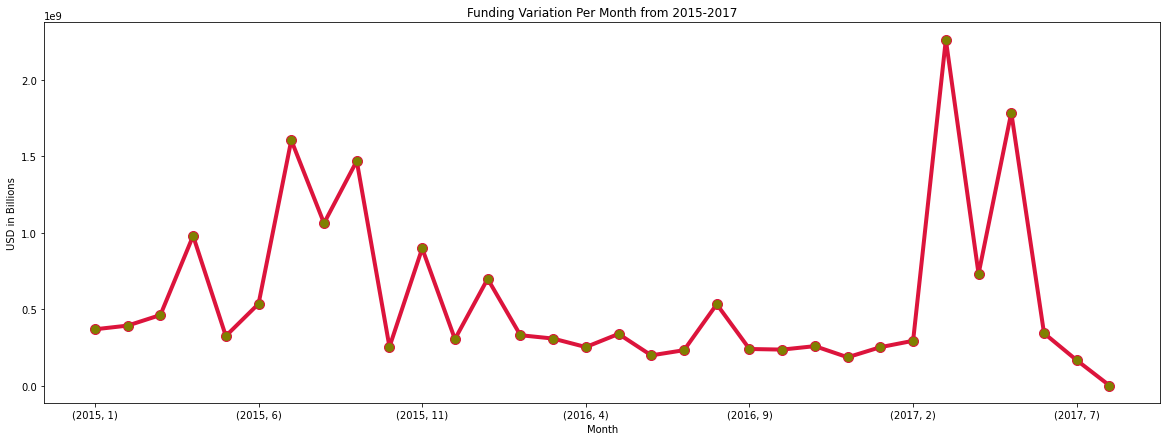

In [95]:
funding_data['year']=funding_data['Date'].dt.year
funding_data['month']=funding_data['Date'].dt.month
fig =plt.figure(figsize=(20,7))
fig.set_figheight
ts_month = funding_data.groupby(['year', 'month']).agg({'AmountInUSD':'sum'})['AmountInUSD']
ts_month.plot(linewidth=4, color='crimson',marker="o", markersize=10, markerfacecolor='olive')
plt.ylabel('USD in Billions')
plt.xlabel('Month');
plt.title('Funding Variation Per Month from 2015-2017')

**Insights of 2015**
1. Below we can visualize that total funding reached to its peak between the months of june - july and Aug - Sep
2. End week of july was most attracted to investments
3. Quarter 3 was seen as the most funded quarter of 2015

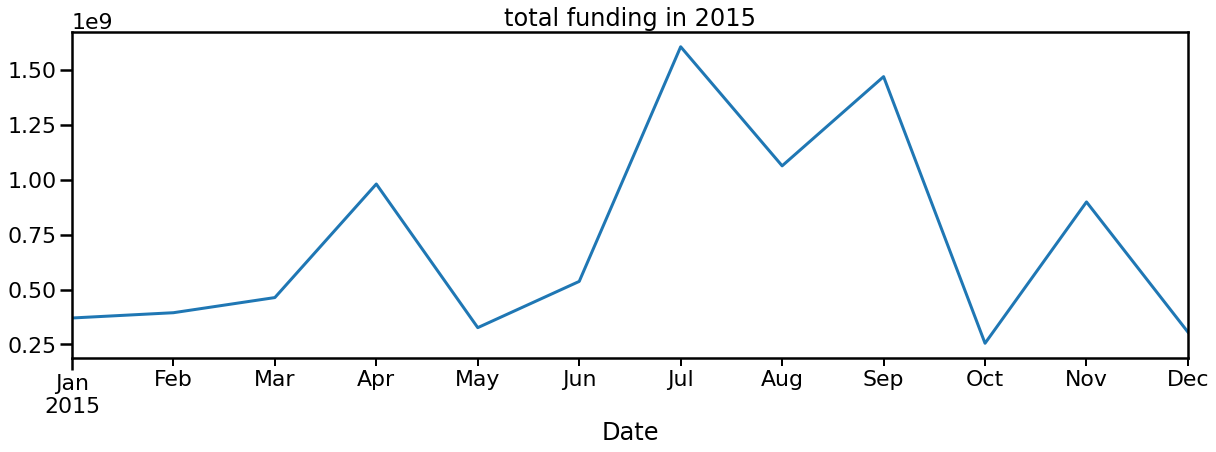

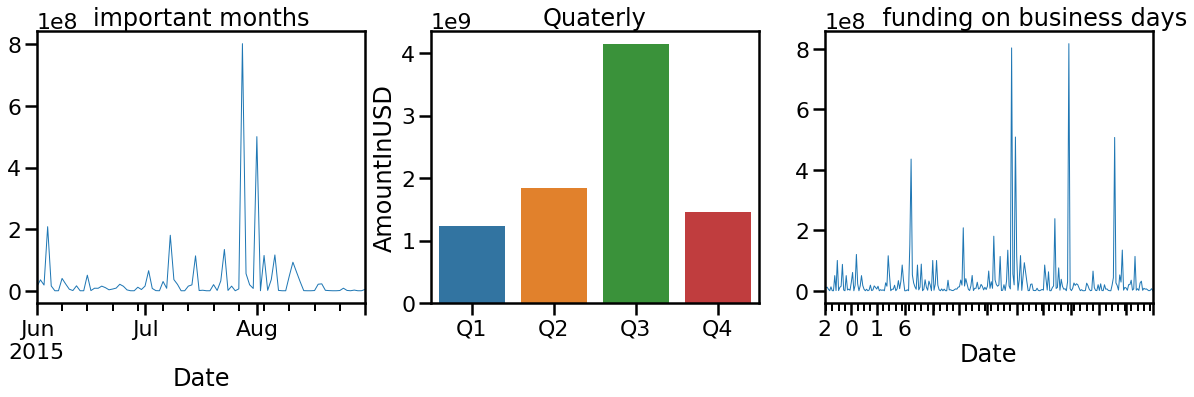

In [96]:
sns.set_context('poster',font_scale=1)
plt.figure(figsize=(20,6))
a=dnewdf['2015'].resample('MS').sum()['AmountInUSD'].plot()
a.set_title('total funding in 2015')
#insights of june-july and augest of 2015
fig2,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))
a1=dnewdf['2015-06':'2015-8'].resample('d')['AmountInUSD'].sum().plot(ax=axes[0],lw=1)
a1.set_title('important months')
a2=sns.barplot(data=dnewdf['2015'].resample('Q').sum().reset_index(),y='AmountInUSD',x=['Q1','Q2','Q3','Q4'],ax=axes[1])
a2.set_title('Quaterly')
a3=dnewdf['2015'].resample('B')['AmountInUSD'].sum().plot(ax=axes[2],lw=1)
a3.set_title('            funding on business days')
a3.set_xticklabels('2016')
plt.show()

**Insights of 2016**
1. It seems to be january and augest was the most funding month in 2016
2. A sudden increase is witnessed in the month of july - August

3. June seems to be the decline in funding may be due to goverment administration

4. Further after september uniform low funding due to demonetization of indian currency

5. Early weeeks of augest seems to be the most funding time

6. An inverse relation among funding by Quarter

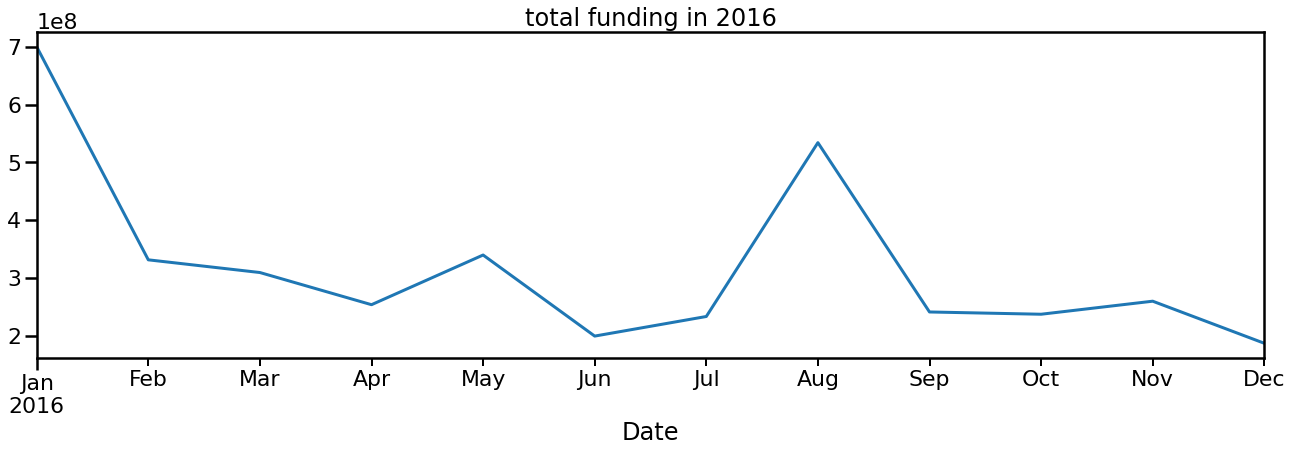

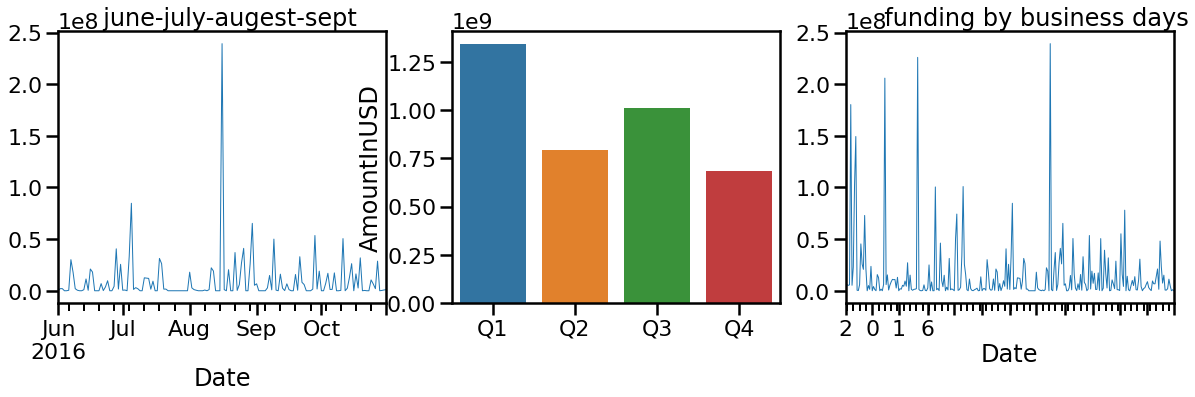

In [97]:
sns.set_context('poster',font_scale=1)


plt.figure(figsize=(22,6))


a=dnewdf['2016'].resample('MS').sum()['AmountInUSD'].plot()
a.set_title('total funding in 2016')
#insights of june-july and augest of 2015

fig2,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))

a1=dnewdf['2016-06':'2016-10'].resample('d')['AmountInUSD'].sum().fillna(method='ffill').plot(ax=axes[0],lw=1)
a1.set_title('  june-july-augest-sept')

sns.barplot(data=dnewdf['2016'].resample('Q').sum().reset_index(),y='AmountInUSD',x=['Q1','Q2','Q3','Q4'],ax=axes[1])
a2.set_title('Quaterly')

a3=dnewdf['2016'].resample('B')['AmountInUSD'].sum().plot(ax=axes[2],lw=1)
a3.set_title('       funding by business days')

a3.set_xticklabels('2016')
plt.show()

**Insights of 2017**

1. Month of March and second Week of May had seen peak funding scenarios
2. Quarter 2 has most funding

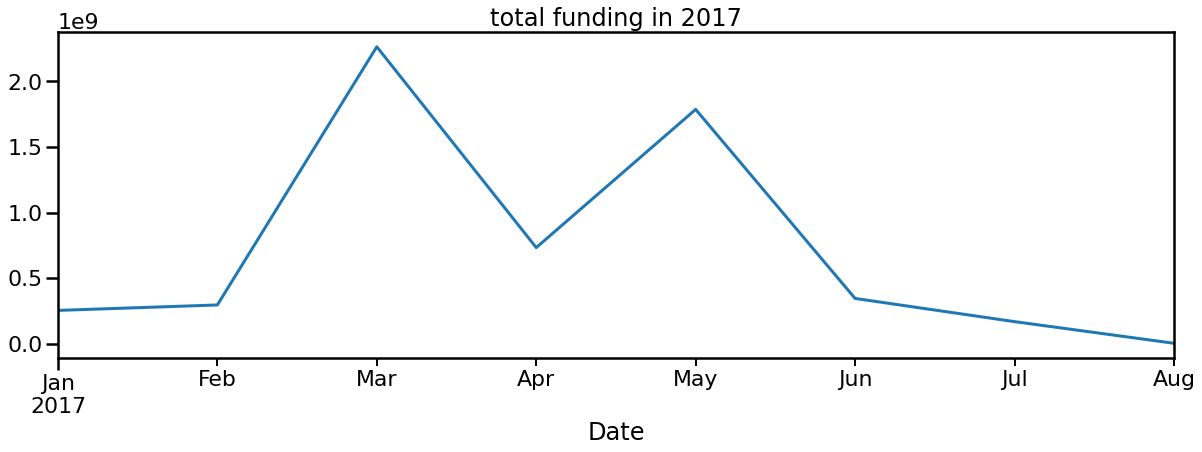

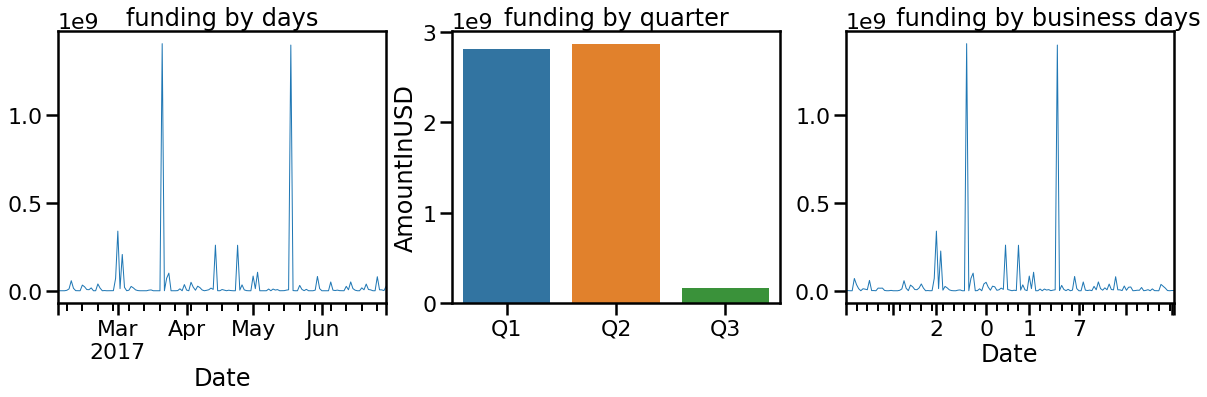

In [98]:
sns.set_context('poster',font_scale=1)


plt.figure(figsize=(20,6))


a=dnewdf['2017'].resample('MS').sum()['AmountInUSD'].plot()
a.set_title('total funding in 2017')
#insights of june-july and augest of 2015

fig2,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))
a1=dnewdf['2017-02':'2017-6'].resample('d')['AmountInUSD'].sum().fillna(method='ffill').plot(ax=axes[0],lw=1)
a1.set_title('funding by days')

a2=sns.barplot(data=dnewdf['2017'].resample('Q').sum().reset_index(),y='AmountInUSD',x=['Q1','Q2','Q3'],ax=axes[1])
a2.set_title('funding by quarter')

a3=dnewdf['2017'].resample('B')['AmountInUSD'].sum().plot(ax=axes[2],lw=1)
a3.set_title('          funding by business days')
a3.set_xticklabels('  2017')
plt.show()

**CONCLUSION**


1. Funding startups are highly dispersed as investors are highly specific about choosing startups
2. There were more than 2000 new startups funded in the year between 2015-2017
3. Paytm and Flipkart were funded most
4. Top 10 investments are made through private equity
5. Paytm was mostly funded on different days by single investor
6. Swiggy was invested by most number of investors
7. As per startups 2 and 3 were most frequent combination of   investors
7. There were 50% relation between funded amount and number of investors per startup
8. There were more than 1900 unique investors
9. Steadview capital and existing investors invested highest amount.
10. E.ventures Investor funded 115 times the most.
11. Ola was Funded most frequent number of times.
12. Consumer internet was the top most choice for all investors.
13. Top investors funded ecommerce and consumer internet most in terms of amount.
14. Most funding came through private equity
15. Crowd funding and dept funding were less preferred by the investors
16. Seed funding was less dispersed but private equity is choosen to made large investments per startup
17. Consumer internet sector got most ammount of funding and attracted the most investors
18. Banglore had the most average funding
19. Maximum Total funding was generated in the year 2015 and then it slowly decreased with increase in years
20. Average funding was most in 2017
21. In 2015 the period of june-oct was funded most and quarter 3 was funded most
22. In 2016 period of june and september were most funded and quterly funding decreased with increase in time
23. In 2017 the period between march- may had recieved most fundings
24. 3rd quarter of 2015 was invested most and funding amount was normally distributed
25. Starting months of 2015,mid of 2016 and 3rd Quarter of 2017 were funded most as per individual investment
2016 had highest amount of investments
26. In 2015 there was slight fund generated through crowd funding
27. In 2016 there was slight variation in seed funding by amount
28. In 2017 there dept funding witnessed for first time but in less fraction as Ahmedabad seems to be an anomaly as it only witnessed the debt funding
29. Amount Distribution in 2017 (left skewed) was totally opposite to 2015(right skewed) in terms of Date. 2016's Amount distribution was normally distributed